# SENTIMENT ANALYSIS - AMAZON PHONES DATASET

### Library imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset, DatasetDict
from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
from plotly import subplots
import plotly.offline as py
import plotly.graph_objs as go
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from transformers import pipeline

sns.set() # use seaborn plotting style


%cd ..
from utils import preprocessing_helpers


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\FT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


e:\ELFAK\NLP\Project_Sentiment-Analysis


e:\ELFAK\NLP\Project_Sentiment-Analysis\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading dataset

In [2]:
dataset = pd.read_csv("./data/Amazon_Unlocked_Mobile.csv", index_col=False)


### Dataset review

In [3]:
dataset.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
dataset.describe(include='object')

,Product Name,Brand Name,Reviews
count,413840,348669,413770
unique,4410,384,162490
top,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,Samsung,Good
freq,1451,65747,2879


In [5]:
dataset.isna().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            70
Review Votes    12296
dtype: int64

# Dataset preprocessing

### Encoding rating feature

In [6]:
dataset['Label'] = dataset['Rating'].apply(preprocessing_helpers.Encode_rating) 

filtered_dataset = dataset[['Reviews', 'Label']].copy()
filtered_dataset.describe()

,Reviews,Label
count,413770,413840
unique,162490,3
top,Good,Positive
freq,2879,284997


### Dropping rows with NaN

In [7]:
filtered_dataset.dropna(inplace=True)

In [8]:
filtered_dataset.describe()

,Reviews,Label
count,413770,413770
unique,162490,3
top,Good,Positive
freq,2879,284948


In [9]:
filtered_dataset.head()

,Reviews,Label
0,I feel so LUCKY to have found this used (phone...,Positive
1,"nice phone, nice up grade from my pantach revu...",Positive
2,Very pleased,Positive
3,It works good but it goes slow sometimes but i...,Positive
4,Great phone to replace my lost phone. The only...,Positive


In [76]:
non_preprocessed_dataset = filtered_dataset.copy()

### Removing URLs from review feature

In [10]:
filtered_dataset['CleanReviews'] = filtered_dataset['Reviews'].apply(preprocessing_helpers.Removing_url)

### Removing characters that are not alphanumeric

In [11]:
filtered_dataset['CleanReviews'] = filtered_dataset['CleanReviews'].apply(preprocessing_helpers.Clean_non_alphanumeric)

### Converting reviews to lower case 

In [12]:
filtered_dataset['CleanReviews'] = filtered_dataset['CleanReviews'].apply(preprocessing_helpers.Convert_to_lowercase)

### Tokenization of review texts

In [13]:
filtered_dataset['CleanReviews'] = filtered_dataset['CleanReviews'].apply(preprocessing_helpers.Tokenize_text)

### Removing rows where review consisted of only stop words

In [14]:
filtered_dataset = filtered_dataset.replace('', pd.NA).dropna()

In [15]:
print(filtered_dataset.shape)
filtered_dataset.head()

(413770, 3)


,Reviews,Label,CleanReviews
0,I feel so LUCKY to have found this used (phone...,Positive,"[i, feel, so, lucky, to, have, found, this, us..."
1,"nice phone, nice up grade from my pantach revu...",Positive,"[nice, phone, nice, up, grade, from, my, panta..."
2,Very pleased,Positive,"[very, pleased]"
3,It works good but it goes slow sometimes but i...,Positive,"[it, works, good, but, it, goes, slow, sometim..."
4,Great phone to replace my lost phone. The only...,Positive,"[great, phone, to, replace, my, lost, phone, t..."


### Removing english stopwords

In [16]:
print(filtered_dataset.shape)
filtered_dataset['CleanReviews'] = filtered_dataset['CleanReviews'].apply(preprocessing_helpers.Remove_stopwords)

(413770, 3)


### Stemming

In [17]:
#dataset['CleanReviews'] = dataset['CleanReviews'].apply(preprocessing_helpers.Stemming)

### Lemmatization

In [18]:
print(filtered_dataset.shape)
filtered_dataset['CleanReviews'] = filtered_dataset['CleanReviews'].apply(preprocessing_helpers.Lemmatization)

(413770, 3)


In [19]:
filtered_dataset.head(15)

,Reviews,Label,CleanReviews
0,I feel so LUCKY to have found this used (phone...,Positive,"[feel, lucky, find, use, phone, us, use, hard,..."
1,"nice phone, nice up grade from my pantach revu...",Positive,"[nice, phone, nice, grade, pantach, revue, cle..."
2,Very pleased,Positive,[please]
3,It works good but it goes slow sometimes but i...,Positive,"[work, good, go, slow, sometimes, good, phone,..."
4,Great phone to replace my lost phone. The only...,Positive,"[great, phone, replace, lose, phone, thing, vo..."
5,I already had a phone with problems... I know ...,Negative,"[already, phone, problems, know, state, use, d..."
6,The charging port was loose. I got that solder...,Negative,"[charge, port, loose, get, solder, need, new, ..."
7,"Phone looks good but wouldn't stay charged, ha...",Negative,"[phone, look, good, stay, charge, buy, new, ba..."
8,I originally was using the Samsung S2 Galaxy f...,Positive,"[originally, use, samsung, galaxy, sprint, wan..."
9,It's battery life is great. It's very responsi...,Neutral,"[battery, life, great, responsive, touch, issu..."


### Converting list of tokens back to string

In [20]:
print(filtered_dataset.shape)
filtered_dataset['CleanReviews'] = filtered_dataset['CleanReviews'].apply(preprocessing_helpers.Convert_list_of_tokens_to_string)

(413770, 3)


In [21]:
filtered_dataset.head(15)

,Reviews,Label,CleanReviews
0,I feel so LUCKY to have found this used (phone...,Positive,feel lucky find use phone us use hard phone li...
1,"nice phone, nice up grade from my pantach revu...",Positive,nice phone nice grade pantach revue clean set ...
2,Very pleased,Positive,please
3,It works good but it goes slow sometimes but i...,Positive,work good go slow sometimes good phone love
4,Great phone to replace my lost phone. The only...,Positive,great phone replace lose phone thing volume bu...
5,I already had a phone with problems... I know ...,Negative,already phone problems know state use dang sta...
6,The charging port was loose. I got that solder...,Negative,charge port loose get solder need new battery ...
7,"Phone looks good but wouldn't stay charged, ha...",Negative,phone look good stay charge buy new battery st...
8,I originally was using the Samsung S2 Galaxy f...,Positive,originally use samsung galaxy sprint want retu...
9,It's battery life is great. It's very responsi...,Neutral,battery life great responsive touch issue some...


### Removing texts with more than 2500 tokens (there are about 800 reviews of this type)

In [22]:
print(filtered_dataset.shape)
filtered_dataset = filtered_dataset[ filtered_dataset['CleanReviews'].str.len() < 2500]
print(filtered_dataset.shape)


(413770, 3)
(412985, 3)


### Splitting data to positive and negative datasets

In [23]:
positive_dataset = filtered_dataset[filtered_dataset['Label'] == 'Positive']
negative_dataset = filtered_dataset[filtered_dataset['Label'] == 'Negative']

In [24]:
print("Len of positive dataset: ", positive_dataset.shape[0])
print("Len of negative dataset: ", negative_dataset.shape[0])

Len of positive dataset:  284370
Len of negative dataset:  96932


In [25]:
negative_dataset.head()

,Reviews,Label,CleanReviews
5,I already had a phone with problems... I know ...,Negative,already phone problems know state use dang sta...
6,The charging port was loose. I got that solder...,Negative,charge port loose get solder need new battery ...
7,"Phone looks good but wouldn't stay charged, ha...",Negative,phone look good stay charge buy new battery st...
13,I'm really disappointed about my phone and ser...,Negative,really disappoint phone service phone go week ...
15,Had this phone before and loved it but was not...,Negative,phone love work get phone one thing sd card sl...


In [26]:
reduced_filtered_dataset = filtered_dataset[:2000]
reduced_filtered_dataset

,Reviews,Label,CleanReviews
0,I feel so LUCKY to have found this used (phone...,Positive,feel lucky find use phone us use hard phone li...
1,"nice phone, nice up grade from my pantach revu...",Positive,nice phone nice grade pantach revue clean set ...
2,Very pleased,Positive,please
3,It works good but it goes slow sometimes but i...,Positive,work good go slow sometimes good phone love
4,Great phone to replace my lost phone. The only...,Positive,great phone replace lose phone thing volume bu...
...,...,...,...
2001,I had a great hope for this product.This phone...,Neutral,great hope product phone far better phone rang...
2002,Im absolutely amazed with the sound of the spe...,Positive,im absolutely amaze sound speakers htc jbl spe...
2003,Horribleeee experience with this cell phone......,Negative,horribleeee experience cell phone buy first on...
2004,So far very good!,Positive,far good


# EDA Analysis

### Rating attribute before conversion

<Axes: ylabel='Rating'>

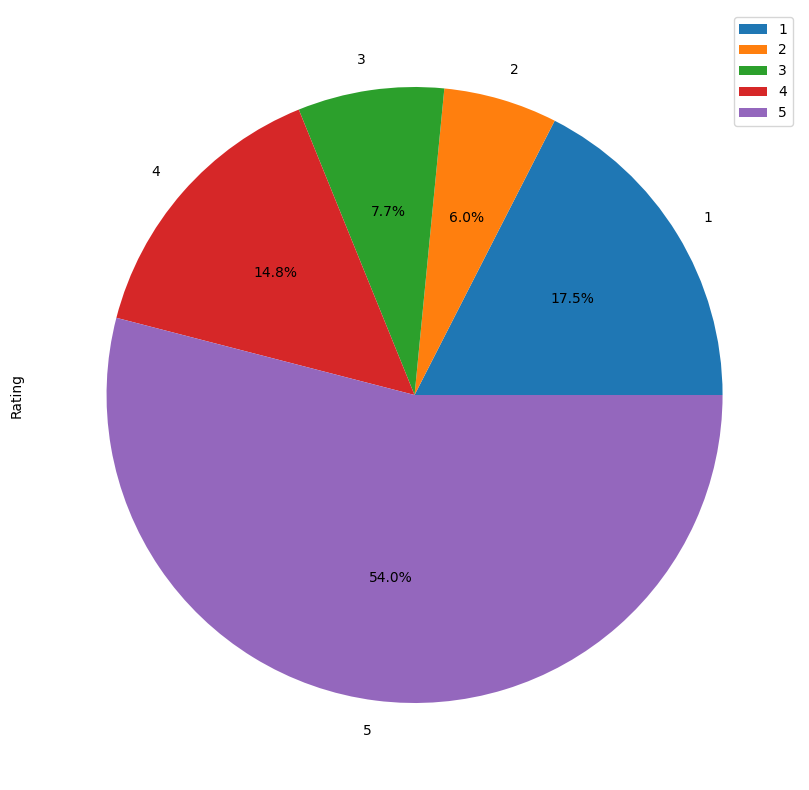

In [30]:
type_counts = dataset['Rating'].value_counts()
df2 = pd.DataFrame({'Rating': type_counts}, 
                     index = [1, 2, 3, 4, 5])
df2.plot.pie(y='Rating', figsize=(10,10), autopct='%1.1f%%')

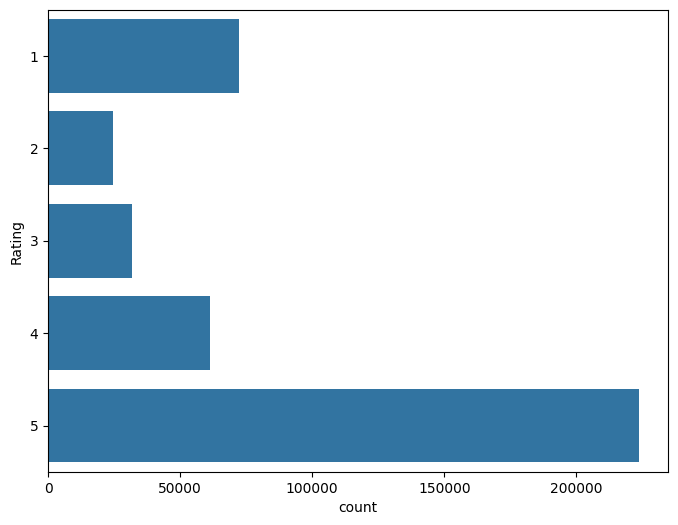

In [31]:
labels = dataset[['Rating']]
plt.figure(figsize=(8,6))
sns.countplot(y='Rating', data=labels)
plt.show()

### Reduced dataset

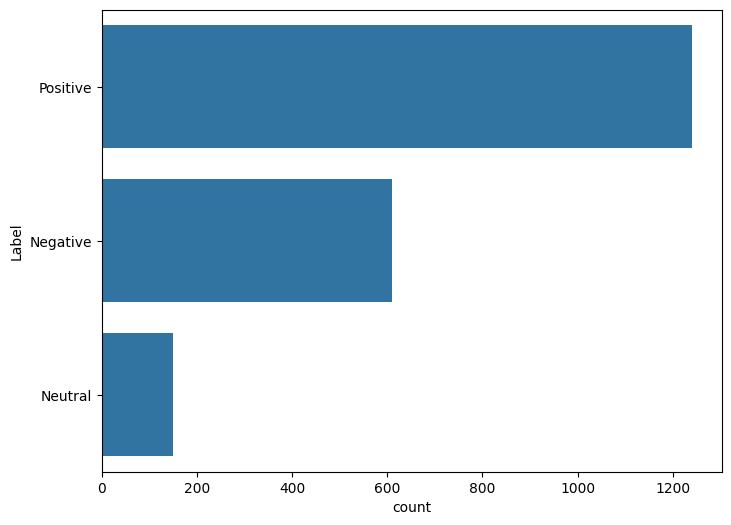

In [77]:
labels = reduced_filtered_dataset[['Label']]
plt.figure(figsize=(8,6))
sns.countplot(y='Label', data=labels)
plt.show()

### Label attribute (Rating attribute after conversion)

<Axes: ylabel='Label'>

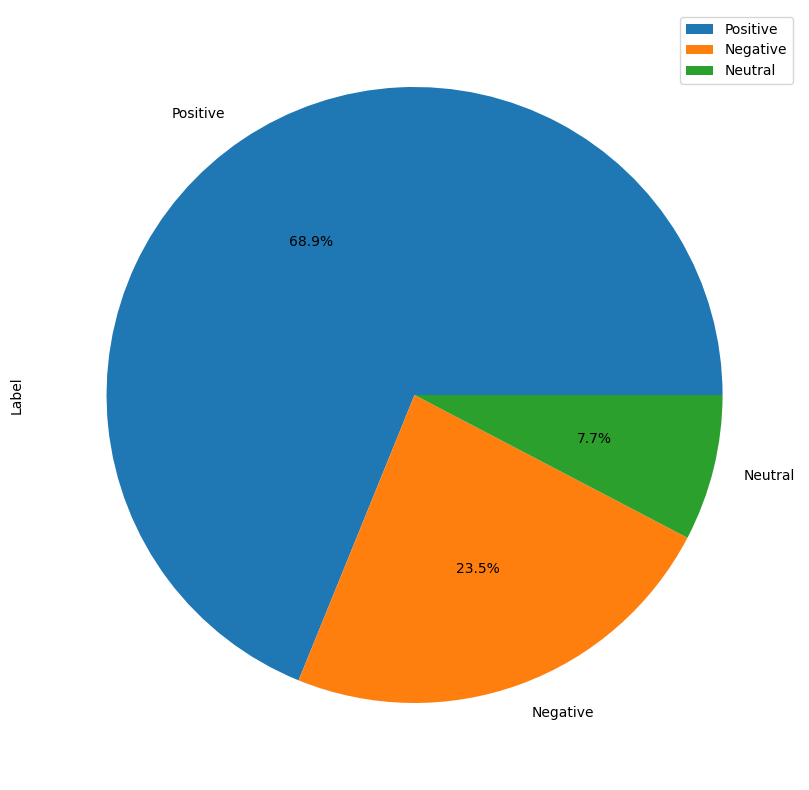

In [32]:
type_counts = filtered_dataset['Label'].value_counts()
df2 = pd.DataFrame({'Label': type_counts}, 
                     index = ['Positive', 'Negative', 'Neutral'])
df2.plot.pie(y='Label', figsize=(10,10), autopct='%1.1f%%')

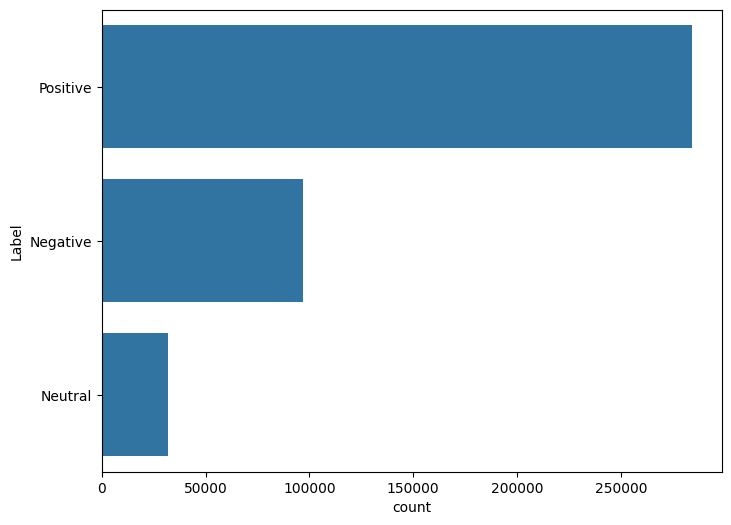

In [33]:
labels = filtered_dataset[['Label']]
plt.figure(figsize=(8,6))
sns.countplot(y='Label', data=labels)
plt.show()

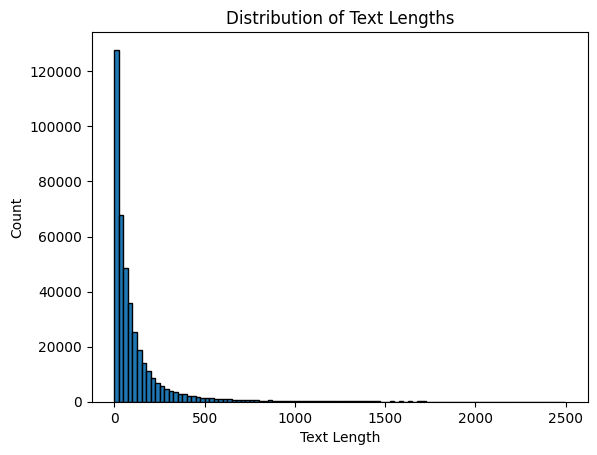

In [51]:
# Calculate the length of each text in 'safe_text'
text_lengths = filtered_dataset['CleanReviews'].apply(len)

# Plot the distribution of text lengths
plt.hist(text_lengths, bins=100, edgecolor='black')
plt.xlabel('Text Length')
#plt.xlim(0, 2500)
plt.ylabel('Count')
plt.title('Distribution of Text Lengths')

plt.show()

### WordCloud

In [53]:

def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(16, 8), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown', 'phone'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()  
    

#### Positive wordcloud

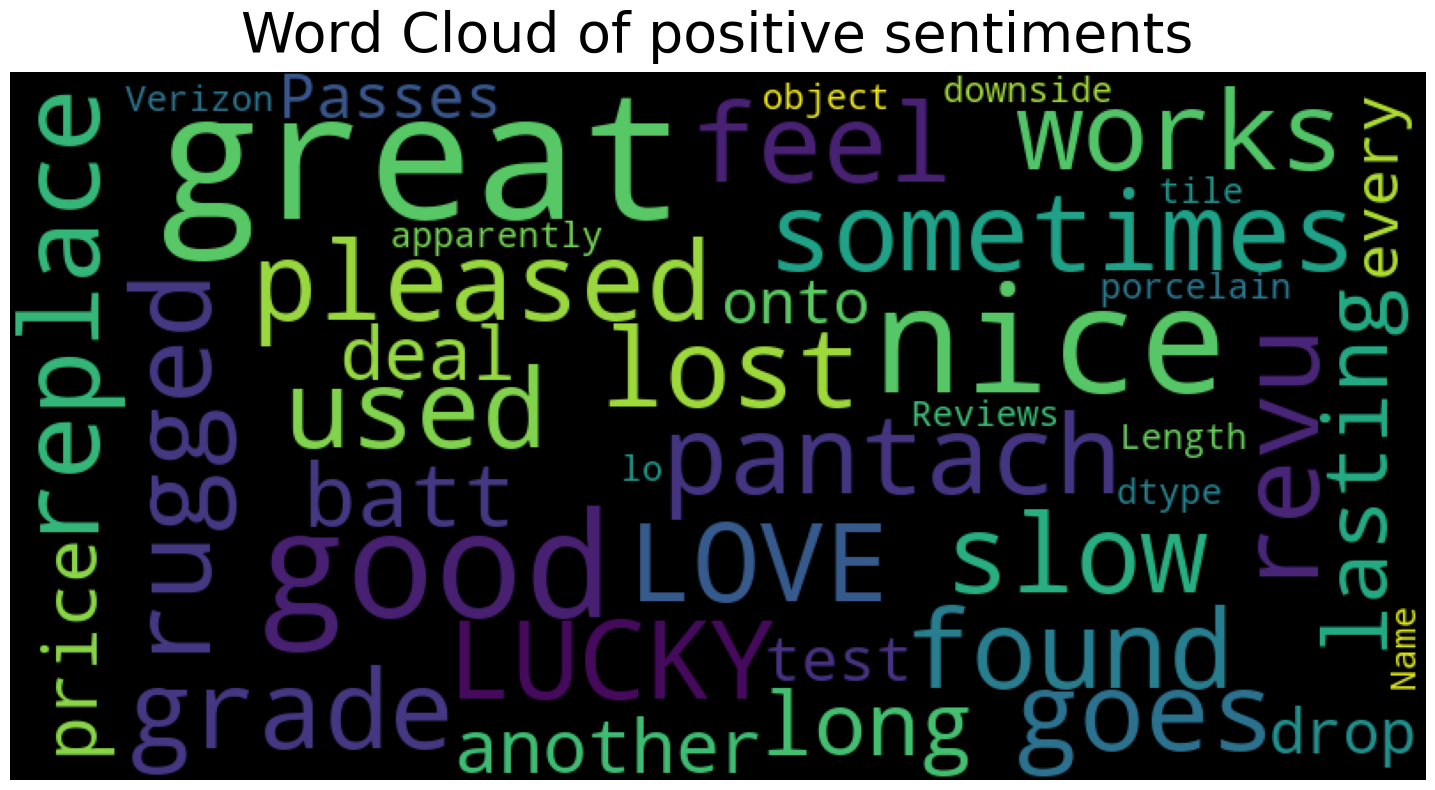

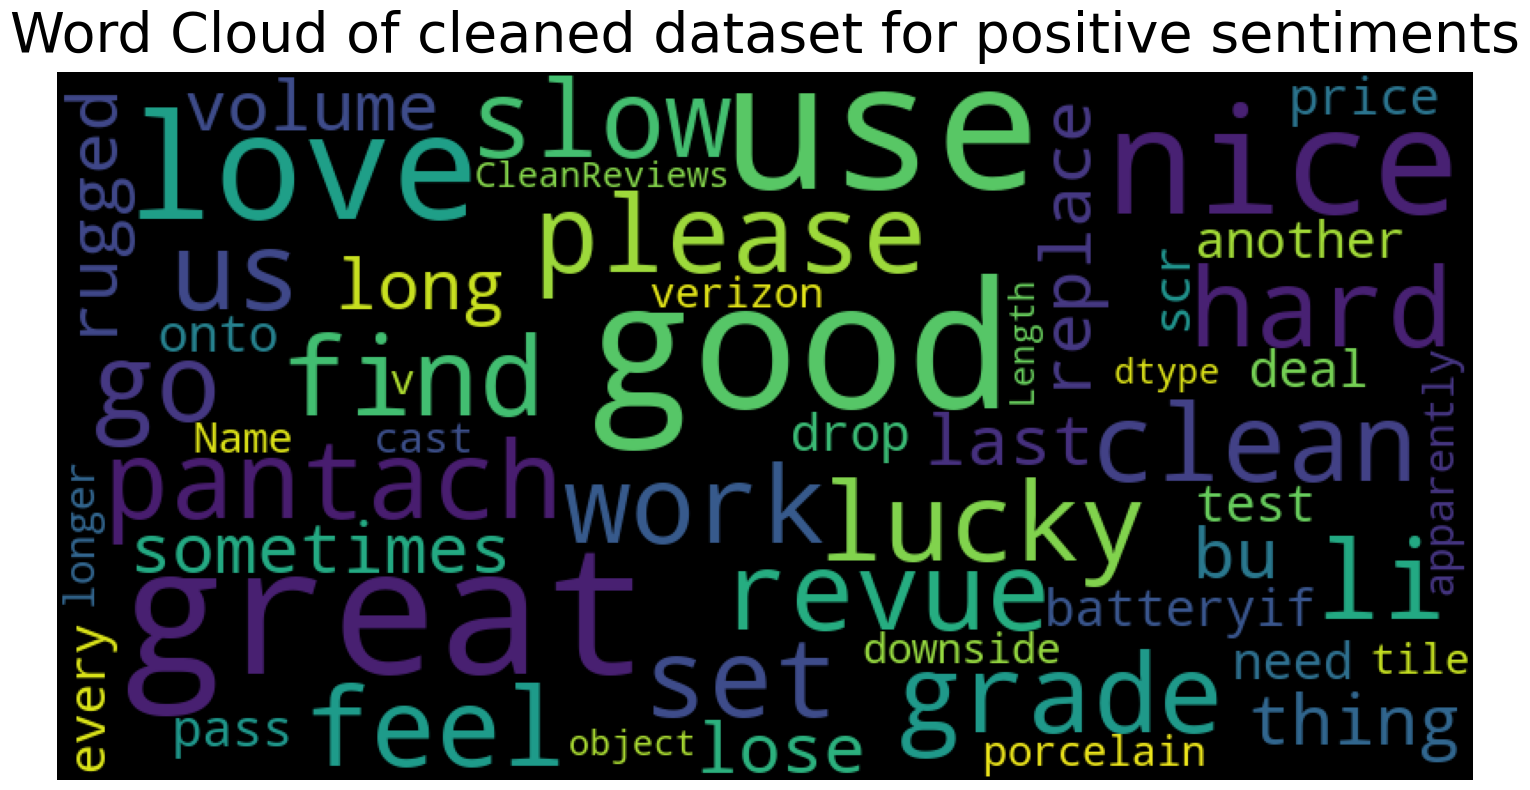

In [54]:
plot_wordcloud(positive_dataset['Reviews'], title="Word Cloud of positive sentiments")
plot_wordcloud(positive_dataset['CleanReviews'], title="Word Cloud of cleaned dataset for positive sentiments")



#### Negative wordcloud

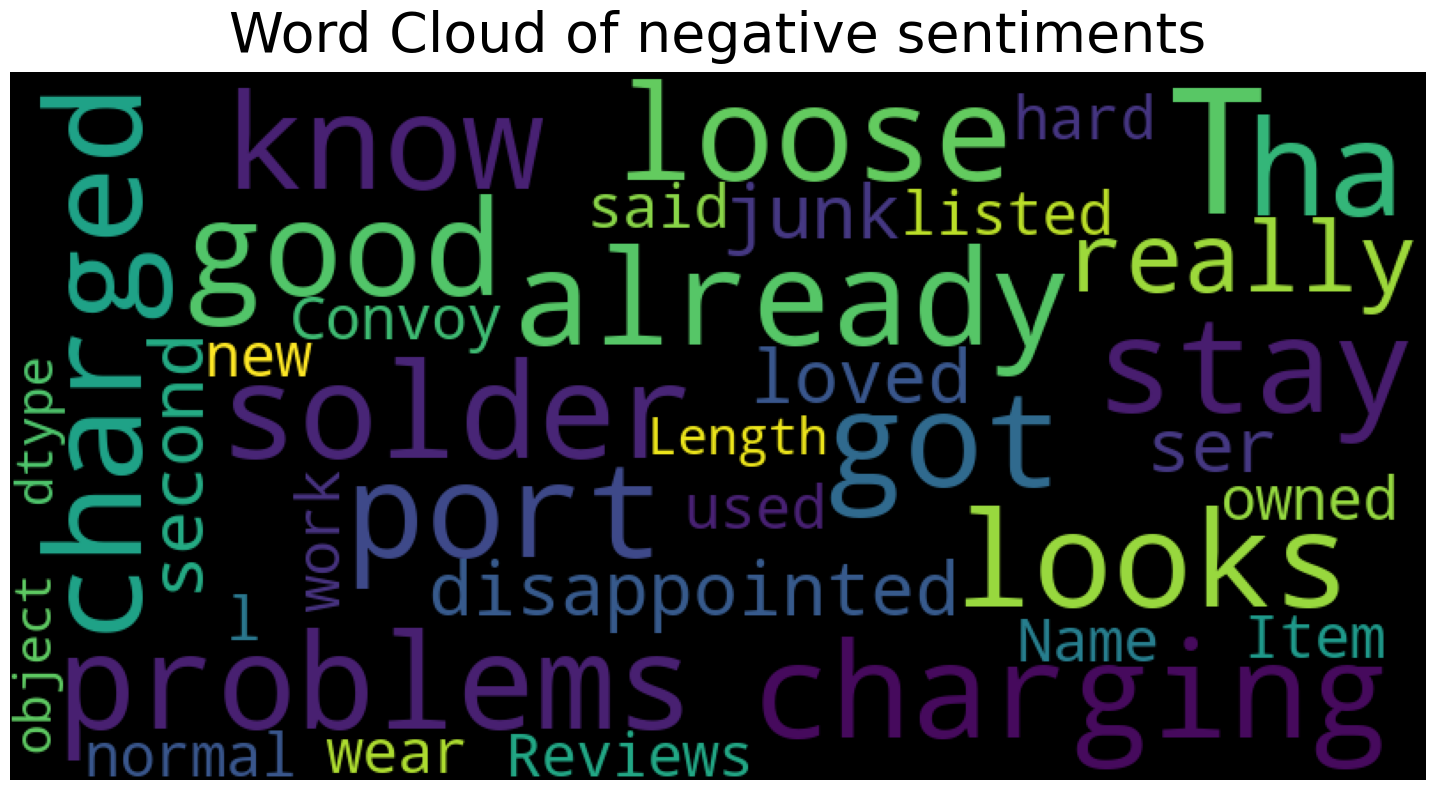

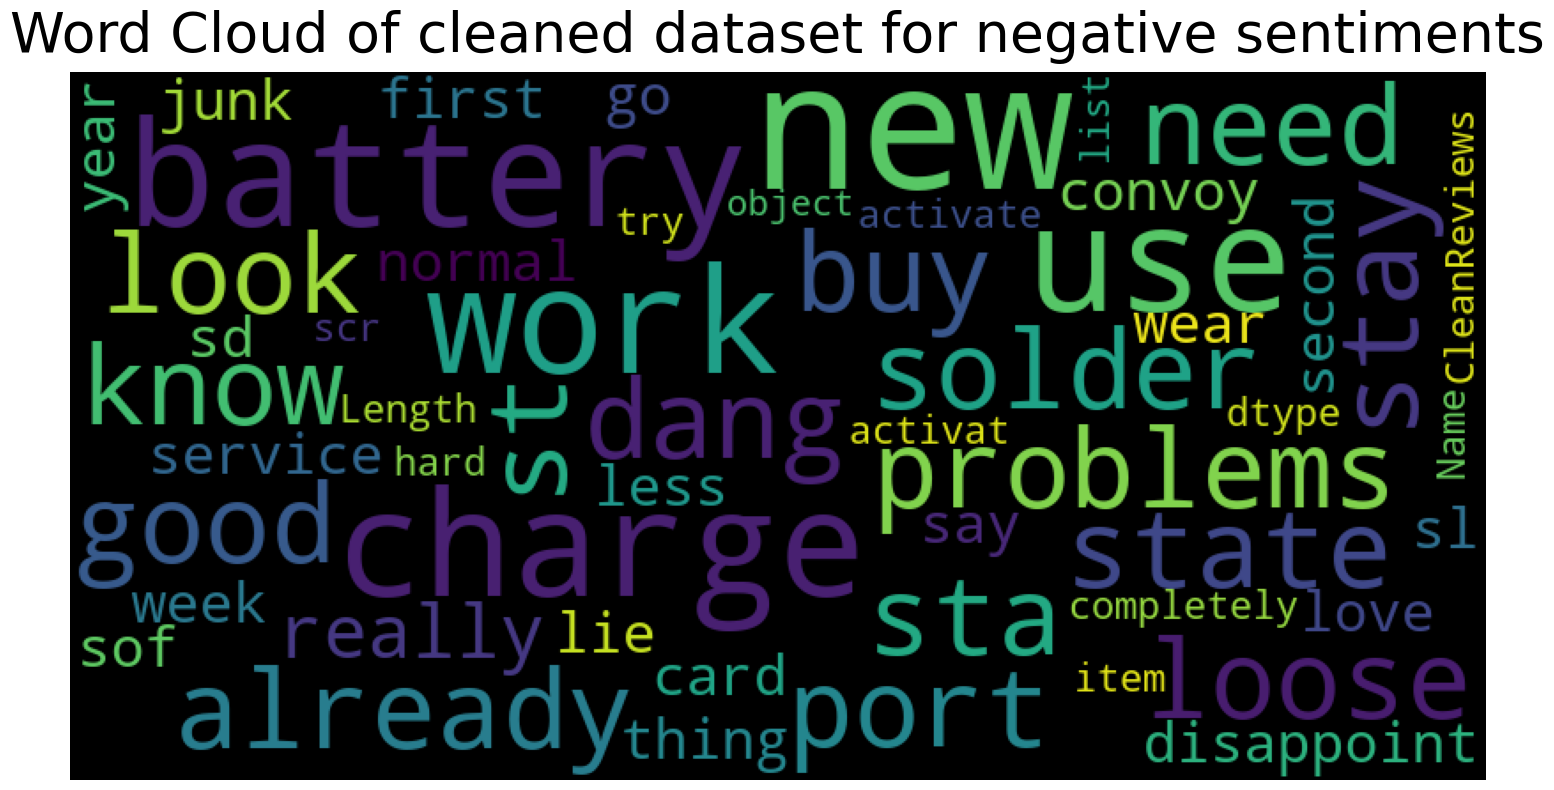

In [55]:
plot_wordcloud(negative_dataset['Reviews'], title="Word Cloud of negative sentiments")
plot_wordcloud(negative_dataset['CleanReviews'], title="Word Cloud of cleaned dataset for negative sentiments")

#### Word count plots

In [59]:

def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

common_words = ['phone', 'phone.', 'phone,', 'will', 'one', 'screen', 'battery', 'even', 'use', 'it.']

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in positive_dataset["CleanReviews"]:
    for word in generate_ngrams(sent):
        if word not in common_words:
            freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in negative_dataset["CleanReviews"]:
    for word in generate_ngrams(sent):
        if word not in common_words:
            freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", 
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

### Generating N-grams

#### 2-grams

In [143]:
freq_dict = defaultdict(int)
for sent in positive_dataset["CleanReviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in negative_dataset["CleanReviews"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of positive reviews", 
                                          "Frequent bigrams of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

#### 3-grams

In [146]:
freq_dict = defaultdict(int)
for sent in positive_dataset["CleanReviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in negative_dataset["CleanReviews"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = subplots.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of positive reviews", 
                                          "Frequent bigrams of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

#
<div style="background-color:#ffffff;
            letter-spacing:0.5px; text-align: left;">

<h1 style="padding: 5px 0px; color:#028667; font-weight: bold; font-family: Times New Roman">
TRAINING</h1>
</div>

In [28]:
filtered_dataset

,Reviews,Label,CleanReviews
0,I feel so LUCKY to have found this used (phone...,Positive,feel lucky find use phone us use hard phone li...
1,"nice phone, nice up grade from my pantach revu...",Positive,nice phone nice grade pantach revue clean set ...
2,Very pleased,Positive,please
3,It works good but it goes slow sometimes but i...,Positive,work good go slow sometimes good phone love
4,Great phone to replace my lost phone. The only...,Positive,great phone replace lose phone thing volume bu...
...,...,...,...
413835,another great deal great price,Positive,another great deal great price
413836,Ok,Neutral,ok
413837,Passes every drop test onto porcelain tile!,Positive,pass every drop test onto porcelain tile
413838,I returned it because it did not meet my needs...,Neutral,return meet need seem good selection others


In [44]:
reduced_filtered_dataset

,Reviews,Label,CleanReviews
0,I feel so LUCKY to have found this used (phone...,Positive,feel lucky find use phone us use hard phone li...
1,"nice phone, nice up grade from my pantach revu...",Positive,nice phone nice grade pantach revue clean set ...
2,Very pleased,Positive,please
3,It works good but it goes slow sometimes but i...,Positive,work good go slow sometimes good phone love
4,Great phone to replace my lost phone. The only...,Positive,great phone replace lose phone thing volume bu...
...,...,...,...
2001,I had a great hope for this product.This phone...,Neutral,great hope product phone far better phone rang...
2002,Im absolutely amazed with the sound of the spe...,Positive,im absolutely amaze sound speakers htc jbl spe...
2003,Horribleeee experience with this cell phone......,Negative,horribleeee experience cell phone buy first on...
2004,So far very good!,Positive,far good


# Bag of Words Transformation vs TF-IDF Transformation

## Includes:
- Bow transformations
- Tf-Idf transformations
- Training Classification algorithms

## Train test split

In [ ]:
training_data, test_data = train_test_split(filtered_dataset, train_size = 0.7, random_state=42)

In [27]:

def simple_logistic_classify(model, X_tr, y_tr, X_test, y_test, description):

    model = model.fit(X_tr, y_tr)

    score = model.score(X_test, y_test)
    print('Test Score with', description, 'features', score)

    # plotting the confusion matrix
    y_pred = model.predict(X_test)
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Classification report :")
    print(classification_report(y_test, y_pred))

    mat = confusion_matrix(y_test, y_pred, labels=y_test.unique())
    sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.xlabel("true labels")
    plt.ylabel("predicted label")
    plt.show()
    print('*' * 50)
    return model


## 1-gram representations

### 1-gram representation of BOW Transformation

In [28]:
bow_vectorizer = CountVectorizer(lowercase=False)

X = bow_vectorizer.fit_transform(training_data['CleanReviews'][:5]) 
pd.DataFrame(X.A, columns=bow_vectorizer.get_feature_names_out())

,arrive,buy,charge,daughter,december,freeze,go,good,great,hat,...,picture,price,quality,return,screen,store,today,try,unfreeze,year
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,1,0,2,0,2,0,...,0,1,0,0,0,1,1,2,0,1
2,0,1,0,1,0,1,0,1,0,0,...,1,0,1,1,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


### 1-gram representation of TfidfTransformer transforming results from BOW Transformation

In [29]:
tfidf_transform = TfidfTransformer(norm=None)
X = tfidf_transform.fit_transform(X)
pd.DataFrame(X.A, columns=bow_vectorizer.get_feature_names_out())

,arrive,buy,charge,daughter,december,freeze,go,good,great,hat,...,picture,price,quality,return,screen,store,today,try,unfreeze,year
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.405465,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2.098612,1.693147,2.098612,0.000000,2.098612,0.000000,4.197225,0.000000,4.197225,0.000000,...,0.000000,1.693147,0.000000,0.000000,0.000000,2.098612,2.098612,3.386294,0.000000,2.098612
2,0.000000,1.693147,0.000000,2.098612,0.000000,2.098612,0.000000,1.405465,0.000000,0.000000,...,2.098612,0.000000,2.098612,2.098612,2.098612,0.000000,0.000000,1.693147,2.098612,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.098612,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.405465,0.000000,0.000000,...,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 1-gram representation of TfIdfVectorizer without IDF

In [30]:
vectorizer = TfidfVectorizer(use_idf=False) 
X = vectorizer.fit_transform(training_data['CleanReviews'][:5]) 
df = pd.DataFrame(np.round(X.A,3), columns=vectorizer.get_feature_names_out())
df

,arrive,buy,charge,daughter,december,freeze,go,good,great,hat,...,picture,price,quality,return,screen,store,today,try,unfreeze,year
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.707,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.174,0.174,0.174,0.000,0.174,0.000,0.348,0.000,0.348,0.0,...,0.000,0.174,0.000,0.000,0.000,0.174,0.174,0.348,0.000,0.174
2,0.000,0.258,0.000,0.258,0.000,0.258,0.000,0.258,0.000,0.0,...,0.258,0.000,0.258,0.258,0.258,0.000,0.000,0.258,0.258,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.577,0.000,0.0,...,0.000,0.577,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


### 1-gram representation of TfIdfVectorizer with IDF

In [31]:
vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(training_data['CleanReviews'][:5]) 
df = pd.DataFrame(np.round(X.A,3), columns=vectorizer.get_feature_names_out())
df

,arrive,buy,charge,daughter,december,freeze,go,good,great,hat,...,picture,price,quality,return,screen,store,today,try,unfreeze,year
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.765,0.000,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.201,0.162,0.201,0.000,0.201,0.000,0.402,0.000,0.402,0.0,...,0.000,0.162,0.000,0.000,0.000,0.201,0.201,0.324,0.000,0.201
2,0.000,0.243,0.000,0.301,0.000,0.301,0.000,0.202,0.000,0.0,...,0.301,0.000,0.301,0.301,0.301,0.000,0.000,0.243,0.301,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.563,0.000,0.0,...,0.000,0.678,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## Preparing data

### Preparing data using CountVectorizer

In [28]:
bow_transform = CountVectorizer(lowercase=False) #CountVectorizer(tokenizer=lambda doc: doc.split(), ngram_range=(3,3), lowercase=False) #, stop_words='english') 
X_tr_bow = bow_transform.fit_transform(training_data['CleanReviews'])
y_tr = training_data['Label']

y_bow_transform = CountVectorizer(lowercase=False) #CountVectorizer(tokenizer=lambda doc: doc.split(), ngram_range=(3,3), lowercase=False) #, stop_words='english') 

y_tr_transformed_using_bow = y_bow_transform.fit_transform(training_data['Label'])

print("Shape of X_tr_bow: ", X_tr_bow.shape)
print("Shape of y_tr: ", y_tr.shape)

print("len(bow_transform.vocabulary_): ", len(bow_transform.vocabulary_))

X_te_bow = bow_transform.transform(test_data['CleanReviews'])
y_te = test_data['Label']

y_te_transformed_using_bow = y_bow_transform.transform(test_data['Label'])

print("Shape of X_te_bow: ", X_te_bow.shape)
print("Shape of y_te: ", y_te.shape)

print("Shape of y_tr_transformed_using_bow: ", y_tr_transformed_using_bow.shape)
print("Shape of y_te_transformed_using_bow: ", y_te_transformed_using_bow.shape)


Shape of X_tr_bow:  (288821, 47134)
Shape of y_tr:  (288821,)
len(bow_transform.vocabulary_):  47134
Shape of X_te_bow:  (123781, 47134)
Shape of y_te:  (123781,)
Shape of y_tr_transformed_using_bow:  (288821, 3)
Shape of y_te_transformed_using_bow:  (123781, 3)


### Preparing data using TfidfTransformer

In [29]:

tfidf_transform = TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_transform.transform(X_te_bow)

y_tfidf_transform = TfidfTransformer(norm=None)

y_tr_transformed_using_TfIdfTransformer = y_tfidf_transform.fit_transform(y_tr_transformed_using_bow)
y_te_transformed_using_TfIdfTransformer = y_tfidf_transform.transform(y_te_transformed_using_bow)

print("Shape of X_tr_tfidf: ", X_tr_tfidf.shape)
print("Shape of X_te_tfidf: ", X_te_tfidf.shape)

print("Shape of y_tr_transformed_using_TfIdfTransformer: ", y_tr_transformed_using_TfIdfTransformer.shape)
print("Shape of y_te_transformed_using_TfIdfTransformer: ", y_te_transformed_using_TfIdfTransformer.shape)



Shape of X_tr_tfidf:  (288821, 47134)
Shape of X_te_tfidf:  (123781, 47134)
Shape of y_tr_transformed_using_TfIdfTransformer:  (288821, 3)
Shape of y_te_transformed_using_TfIdfTransformer:  (123781, 3)


### Preparing data using TfidfVectorizer

In [30]:

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
X_tfidf_tr = tfidf_vectorizer.fit_transform(training_data['CleanReviews'])
X_tfidf_te = tfidf_vectorizer.transform(test_data['CleanReviews'])

y_tfidf_vectorizer = TfidfVectorizer()
y_tr_transformed_using_TfidfVectorizer = y_tfidf_vectorizer.fit_transform(training_data['Label'])
y_te_transformed_using_TfidfVectorizer = y_tfidf_vectorizer.transform(test_data['Label'])

# X_tfidf_tr_df = pd.DataFrame(np.round(X_tfidf_tr.A[:5, 0],3), columns=tfidf_vectorizer.get_feature_names_out())
# X_tfidf_tr_df

print("Shape of X_tfidf_tr: ", X_tfidf_tr.shape)
print("Shape of X_tfidf_te: ", X_tfidf_te.shape)

print("Shape of y_tr_transformed_using_TfidfVectorizer: ", y_tr_transformed_using_TfidfVectorizer.shape)
print("Shape of y_te_transformed_using_TfidfVectorizer: ", y_te_transformed_using_TfidfVectorizer.shape)



Shape of X_tfidf_tr:  (288821, 47134)
Shape of X_tfidf_te:  (123781, 47134)
Shape of y_tr_transformed_using_TfidfVectorizer:  (288821, 3)
Shape of y_te_transformed_using_TfidfVectorizer:  (123781, 3)


## Classification algorithms using 1-gram vectorizers

### Logistic Regression

e:\ELFAK\NLP\Project_Sentiment-Analysis\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Score with bow features 0.8664011439558575
Accuracy: 0.8664011439558575
Classification report :
              precision    recall  f1-score   support

    Negative       0.82      0.80      0.81     29014
     Neutral       0.55      0.22      0.31      9561
    Positive       0.89      0.96      0.93     85206

    accuracy                           0.87    123781
   macro avg       0.75      0.66      0.68    123781
weighted avg       0.85      0.87      0.85    123781



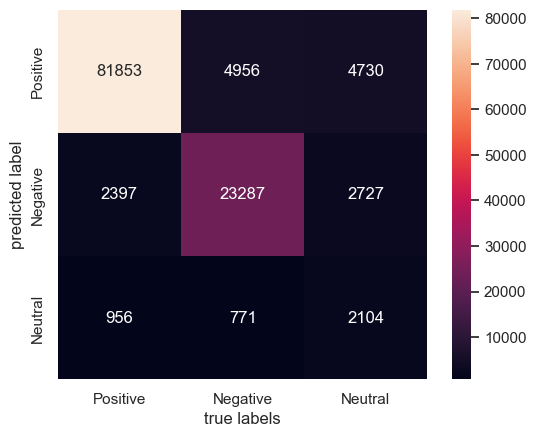

**************************************************


e:\ELFAK\NLP\Project_Sentiment-Analysis\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Score with tf-idf-transformer features 0.8854347597773488
Accuracy: 0.8854347597773488
Classification report :
              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84     29014
     Neutral       0.61      0.37      0.46      9561
    Positive       0.92      0.96      0.94     85206

    accuracy                           0.89    123781
   macro avg       0.79      0.72      0.75    123781
weighted avg       0.88      0.89      0.88    123781



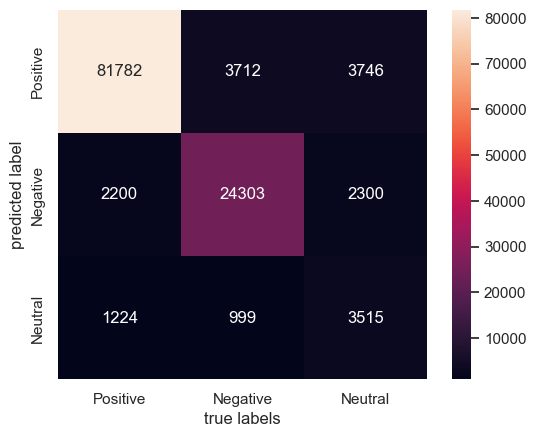

**************************************************


e:\ELFAK\NLP\Project_Sentiment-Analysis\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Score with tf-idf-vectorizer features 0.8718704809300296
Accuracy: 0.8718704809300296
Classification report :
              precision    recall  f1-score   support

    Negative       0.81      0.85      0.83     29014
     Neutral       0.57      0.17      0.26      9561
    Positive       0.90      0.96      0.93     85206

    accuracy                           0.87    123781
   macro avg       0.76      0.66      0.67    123781
weighted avg       0.85      0.87      0.85    123781



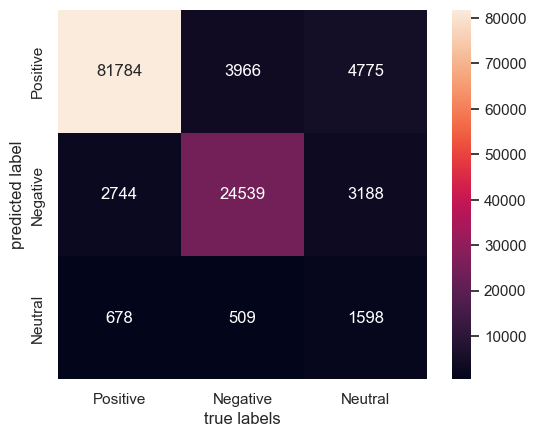

**************************************************


In [31]:
model = LogisticRegression() # C=1.0, random_state=0, max_iter=1000)
model_bow = simple_logistic_classify(model, X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
model_tfidf = simple_logistic_classify(model, X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf-transformer')
model_tfidf = simple_logistic_classify(model, X_tfidf_tr, y_tr, X_tfidf_te, y_te, 'tf-idf-vectorizer')

### Multinomial Naive Bayes

Test Score with bow features 0.8486278184858742
Accuracy: 0.8486278184858742
Classification report :
              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78     29014
     Neutral       0.46      0.20      0.28      9561
    Positive       0.88      0.95      0.91     85206

    accuracy                           0.85    123781
   macro avg       0.71      0.64      0.66    123781
weighted avg       0.83      0.85      0.83    123781



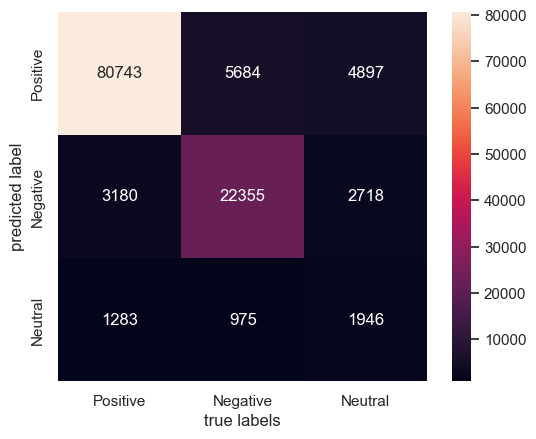

**************************************************
Test Score with tf-idf-transformer features 0.8256113620022459
Accuracy: 0.8256113620022459
Classification report :
              precision    recall  f1-score   support

    Negative       0.76      0.78      0.77     29014
     Neutral       0.33      0.48      0.40      9561
    Positive       0.93      0.88      0.91     85206

    accuracy                           0.83    123781
   macro avg       0.68      0.71      0.69    123781
weighted avg       0.85      0.83      0.83    123781



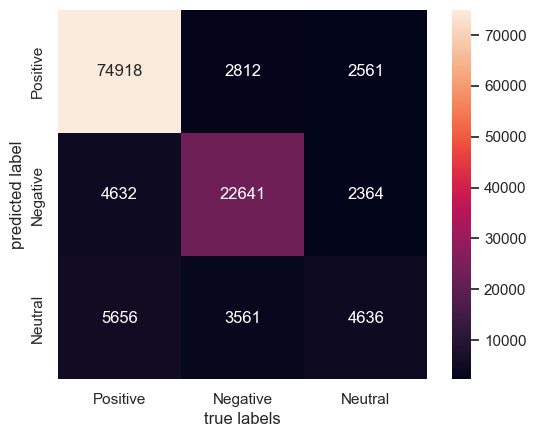

**************************************************
Test Score with tf-idf-vectorizer features 0.8352574304618641
Accuracy: 0.8352574304618641
Classification report :
              precision    recall  f1-score   support

    Negative       0.84      0.67      0.75     29014
     Neutral       0.86      0.02      0.03      9561
    Positive       0.83      0.98      0.90     85206

    accuracy                           0.84    123781
   macro avg       0.84      0.56      0.56    123781
weighted avg       0.84      0.84      0.80    123781



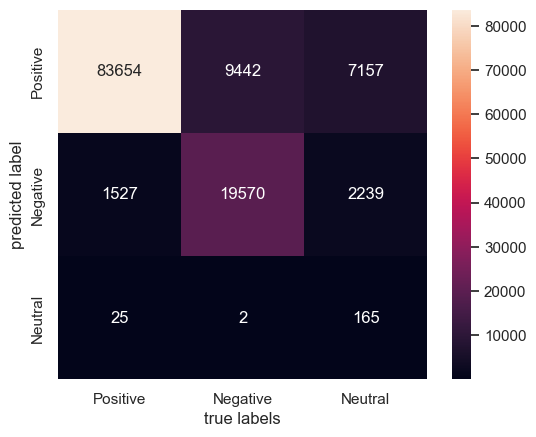

**************************************************


In [32]:
model = MultinomialNB()
model_bow = simple_logistic_classify(model, X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
model_tfidf = simple_logistic_classify(model, X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf-transformer')
model_tfidf = simple_logistic_classify(model, X_tfidf_tr, y_tr, X_tfidf_te, y_te, 'tf-idf-vectorizer')

### XGBoost


Test Score with bow features 0.8519401200507347
Accuracy: 0.8519401200507347
Classification report :
              precision    recall  f1-score   support

           0       0.82      0.74      0.78     29014
           1       0.76      0.14      0.24      9561
           2       0.86      0.97      0.91     85206

    accuracy                           0.85    123781
   macro avg       0.81      0.62      0.64    123781
weighted avg       0.84      0.85      0.83    123781



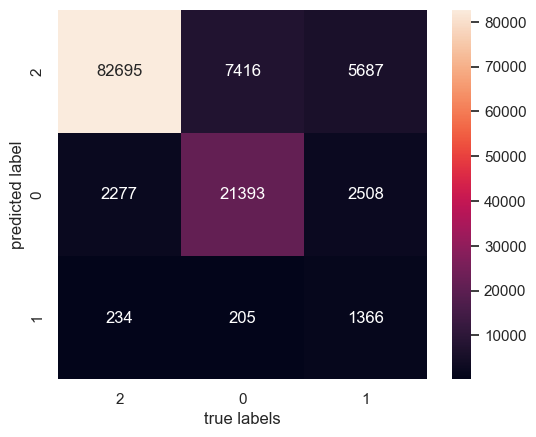

**************************************************
Test Score with tf-idf-transformer features 0.8519401200507347
Accuracy: 0.8519401200507347
Classification report :
              precision    recall  f1-score   support

           0       0.82      0.74      0.78     29014
           1       0.76      0.14      0.24      9561
           2       0.86      0.97      0.91     85206

    accuracy                           0.85    123781
   macro avg       0.81      0.62      0.64    123781
weighted avg       0.84      0.85      0.83    123781



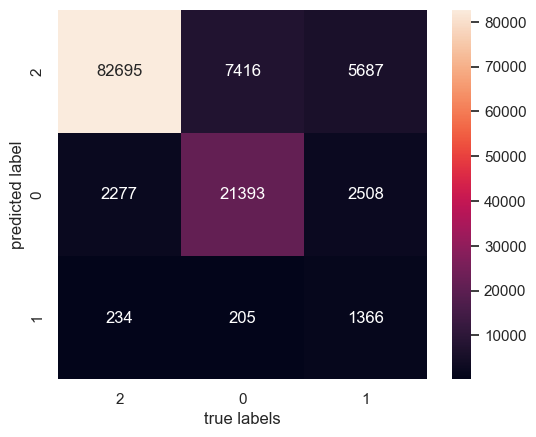

**************************************************
Test Score with tf-idf-vectorizer features 0.8609237281973808
Accuracy: 0.8609237281973808
Classification report :
              precision    recall  f1-score   support

           0       0.82      0.77      0.79     29014
           1       0.79      0.15      0.25      9561
           2       0.87      0.97      0.92     85206

    accuracy                           0.86    123781
   macro avg       0.83      0.63      0.66    123781
weighted avg       0.85      0.86      0.84    123781



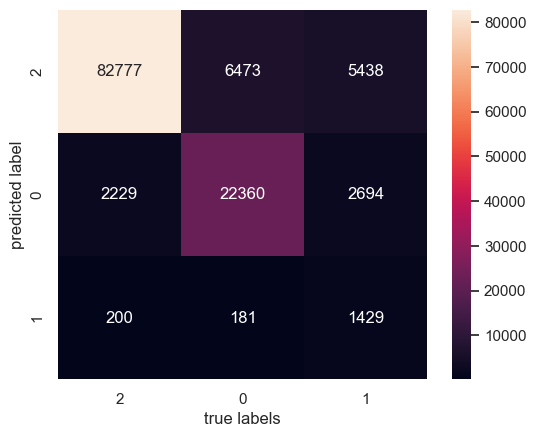

**************************************************


In [33]:

model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')


label_encoder = LabelEncoder()
y_tr_encoded = pd.Series(label_encoder.fit_transform(y_tr))
y_te_encoded = pd.Series(label_encoder.transform(y_te))

model_bow = simple_logistic_classify(model, X_tr_bow, y_tr_encoded, X_te_bow, y_te_encoded, 'bow')
model_tfidf = simple_logistic_classify(model, X_tr_tfidf, y_tr_encoded, X_te_tfidf, y_te_encoded, 'tf-idf-transformer')
model_tfidf = simple_logistic_classify(model, X_tfidf_tr, y_tr_encoded, X_tfidf_te, y_te_encoded, 'tf-idf-vectorizer')

### Support Vector Machine (SVM)

In [35]:
# model = SVC(kernel='linear')
# model_tfidf = simple_logistic_classify(model, X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf-transformer')
# model_tfidf = simple_logistic_classify(model, X_tfidf_tr, y_tr, X_tfidf_te, y_te, 'tf-idf-vectorizer')
# model_bow = simple_logistic_classify(model, X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

##### For some reason, it was working for 315 minutes without any result :(

### Random Forest

In [ ]:
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model_tfidf = simple_logistic_classify(model, X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf-transformer')
# model_tfidf = simple_logistic_classify(model, X_tfidf_tr, y_tr, X_tfidf_te, y_te, 'tf-idf-vectorizer')
# model_bow = simple_logistic_classify(model, X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

## 3-gram representations

### 3-gram representation of BOW Transformation

In [ ]:

# bow_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=(3,3), lowercase=False) #, stop_words='english') 

bow_vectorizer = CountVectorizer(tokenizer=lambda doc: doc.split(), ngram_range=(3,3), lowercase=False)
X = bow_vectorizer.fit_transform(training_data['CleanReviews'][:5]) 
pd.DataFrame(X.A, columns=bow_vectorizer.get_feature_names_out())

e:\ELFAK\NLP\Project_Sentiment-Analysis\.venv\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,arrive today buy,buy husband great,buy phone daughter,daughter picture quality,december price great,freeze nothing try,go store much,go year december,good phone price,good screen freeze,...,picture quality good,price great try,quality good screen,screen freeze nothing,store much phone,today buy husband,try go store,try unfreeze return,unfreeze return phone,year december price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,1,1,0,0,...,0,1,0,0,1,1,1,0,0,1
2,0,0,1,1,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 3-gram representation of TfidfTransformer using result from BOW Transformation

In [ ]:
tfidf_transform = TfidfTransformer(norm=None)
X = tfidf_transform.fit_transform(X)
pd.DataFrame(X.A, columns=bow_vectorizer.get_feature_names_out())

,arrive today buy,buy husband great,buy phone daughter,daughter picture quality,december price great,freeze nothing try,go store much,go year december,good phone price,good screen freeze,...,picture quality good,price great try,quality good screen,screen freeze nothing,store much phone,today buy husband,try go store,try unfreeze return,unfreeze return phone,year december price
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.404174,4.404174,0.000000,0.000000,4.404174,0.000000,4.404174,4.404174,0.000000,0.000000,...,0.000000,4.404174,0.000000,0.000000,4.404174,4.404174,4.404174,0.000000,0.000000,4.404174
2,0.000000,0.000000,4.404174,4.404174,0.000000,4.404174,0.000000,0.000000,0.000000,4.404174,...,4.404174,0.000000,4.404174,4.404174,0.000000,0.000000,0.000000,4.404174,4.404174,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.404174,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 3-gram representation of TfIdfVectorizer without IDF

In [ ]:
vectorizer = TfidfVectorizer(use_idf=False, tokenizer=lambda doc: doc.split(), ngram_range=(3,3)) 
X = vectorizer.fit_transform(training_data['CleanReviews'][:5]) 
df = pd.DataFrame(np.round(X.A,3), columns=vectorizer.get_feature_names_out())
df

e:\ELFAK\NLP\Project_Sentiment-Analysis\.venv\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,arrive today buy,buy husband great,buy phone daughter,daughter picture quality,december price great,freeze nothing try,go store much,go year december,good phone price,good screen freeze,...,picture quality good,price great try,quality good screen,screen freeze nothing,store much phone,today buy husband,try go store,try unfreeze return,unfreeze return phone,year december price
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.229,0.229,0.000,0.000,0.229,0.000,0.229,0.229,0.0,0.000,...,0.000,0.229,0.000,0.000,0.229,0.229,0.229,0.000,0.000,0.229
2,0.000,0.000,0.302,0.302,0.000,0.302,0.000,0.000,0.0,0.302,...,0.302,0.000,0.302,0.302,0.000,0.000,0.000,0.302,0.302,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


### 3-gram representation of TfIdfVectorizer with IDF

In [ ]:
vectorizer = TfidfVectorizer(use_idf=True, tokenizer=lambda doc: doc.split(), ngram_range=(3,3)) 
X = vectorizer.fit_transform(training_data['CleanReviews'][:5]) 
df = pd.DataFrame(np.round(X.A,3), columns=vectorizer.get_feature_names_out())
df

e:\ELFAK\NLP\Project_Sentiment-Analysis\.venv\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,arrive today buy,buy husband great,buy phone daughter,daughter picture quality,december price great,freeze nothing try,go store much,go year december,good phone price,good screen freeze,...,picture quality good,price great try,quality good screen,screen freeze nothing,store much phone,today buy husband,try go store,try unfreeze return,unfreeze return phone,year december price
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.229,0.229,0.000,0.000,0.229,0.000,0.229,0.229,0.0,0.000,...,0.000,0.229,0.000,0.000,0.229,0.229,0.229,0.000,0.000,0.229
2,0.000,0.000,0.302,0.302,0.000,0.302,0.000,0.000,0.0,0.302,...,0.302,0.000,0.302,0.302,0.000,0.000,0.000,0.302,0.302,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## Preparing data

### Preparing data using CountVectorizer

In [101]:
bow_transform = CountVectorizer(tokenizer=lambda doc: doc.split(), ngram_range=(3,3), lowercase=False) #, stop_words='english') 
X_tr_bow = bow_transform.fit_transform(training_data['CleanReviews'])
y_tr = training_data['Label']

print("Shape of X_tr_bow: ", X_tr_bow.shape)
print("Shape of y_tr: ", y_tr.shape)

print("len(bow_transform.vocabulary_): ", len(bow_transform.vocabulary_))

X_te_bow = bow_transform.transform(test_data['CleanReviews'])
y_te = test_data['Label']

print("Shape of X_te_bow: ", X_te_bow.shape)
print("Shape of y_te: ", y_te.shape)


Shape of X_tr_bow:  (288821, 2389884)
Shape of y_tr:  (288821,)
len(bow_transform.vocabulary_):  2389884
Shape of X_te_bow:  (123781, 2389884)
Shape of y_te:  (123781,)


### Preparing data using TfidfTransformer

In [102]:

tfidf_transform = TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_transform.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_transform.transform(X_te_bow)

print("Shape of X_tr_tfidf: ", X_tr_tfidf.shape)
print("Shape of X_te_tfidf: ", X_te_tfidf.shape)


Shape of X_tr_tfidf:  (288821, 2389884)
Shape of X_te_tfidf:  (123781, 2389884)


### Preparing data using TfidfVectorizer

In [103]:

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(use_idf=True, tokenizer=lambda doc: doc.split(), ngram_range=(3,3))

# Fit and transform the text data
X_tfidf_tr = tfidf_vectorizer.fit_transform(training_data['CleanReviews'])
X_tfidf_te = tfidf_vectorizer.transform(test_data['CleanReviews'])

# X_tfidf_tr_df = pd.DataFrame(np.round(X_tfidf_tr.A[:5, 0],3), columns=tfidf_vectorizer.get_feature_names_out())
# X_tfidf_tr_df

print("Shape of X_tfidf_tr: ", X_tfidf_tr.shape)
print("Shape of X_tfidf_te: ", X_tfidf_te.shape)




Shape of X_tfidf_tr:  (288821, 2389884)
Shape of X_tfidf_te:  (123781, 2389884)


## Classification algorithms using 3-gram vectorizers

### Logistic Regression

Test Score with tf-idf-transformer features 0.9010510498380204
Accuracy: 0.9010510498380204
Classification report :
              precision    recall  f1-score   support

    Negative       0.95      0.74      0.84     29014
     Neutral       0.90      0.59      0.71      9561
    Positive       0.89      0.99      0.94     85206

    accuracy                           0.90    123781
   macro avg       0.91      0.77      0.83    123781
weighted avg       0.90      0.90      0.90    123781



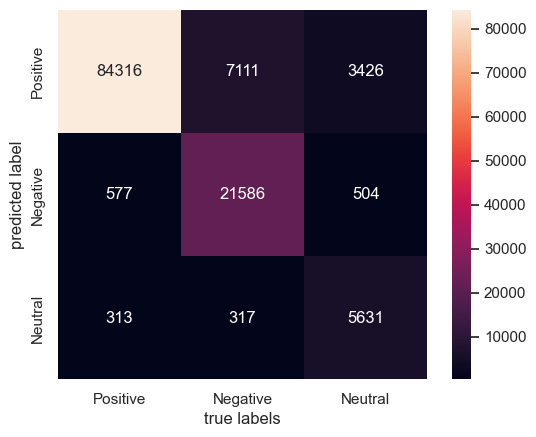

**************************************************
Test Score with tf-idf-vectorizer features 0.8499931330333411
Accuracy: 0.8499931330333411
Classification report :
              precision    recall  f1-score   support

    Negative       0.95      0.61      0.75     29014
     Neutral       0.99      0.28      0.43      9561
    Positive       0.83      1.00      0.90     85206

    accuracy                           0.85    123781
   macro avg       0.92      0.63      0.69    123781
weighted avg       0.87      0.85      0.83    123781



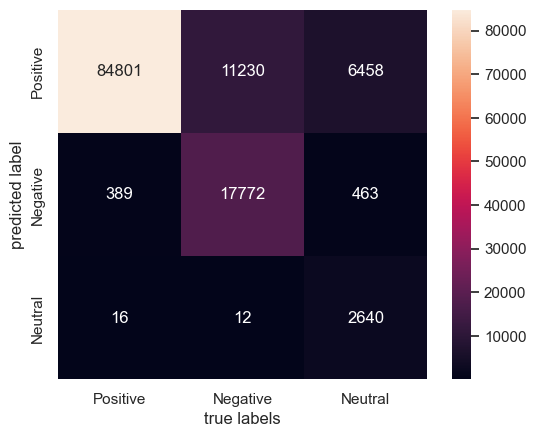

**************************************************
Test Score with bow features 0.8897569093802764
Accuracy: 0.8897569093802764
Classification report :
              precision    recall  f1-score   support

    Negative       0.95      0.70      0.81     29014
     Neutral       0.98      0.53      0.69      9561
    Positive       0.87      0.99      0.93     85206

    accuracy                           0.89    123781
   macro avg       0.93      0.74      0.81    123781
weighted avg       0.90      0.89      0.88    123781



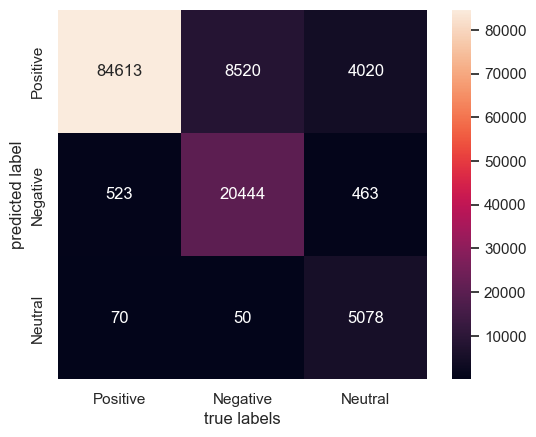

**************************************************


In [104]:
model = LogisticRegression() # C=1.0, random_state=0, max_iter=1000)
model_tfidf = simple_logistic_classify(model, X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf-transformer')
model_tfidf = simple_logistic_classify(model, X_tfidf_tr, y_tr, X_tfidf_te, y_te, 'tf-idf-vectorizer')
model_bow = simple_logistic_classify(model, X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

### Multinomial Naive Bayes

Test Score with tf-idf-transformer features 0.9005259288582255
Accuracy: 0.9005259288582255
Classification report :
              precision    recall  f1-score   support

    Negative       0.91      0.80      0.85     29014
     Neutral       0.70      0.63      0.66      9561
    Positive       0.92      0.96      0.94     85206

    accuracy                           0.90    123781
   macro avg       0.84      0.80      0.82    123781
weighted avg       0.90      0.90      0.90    123781



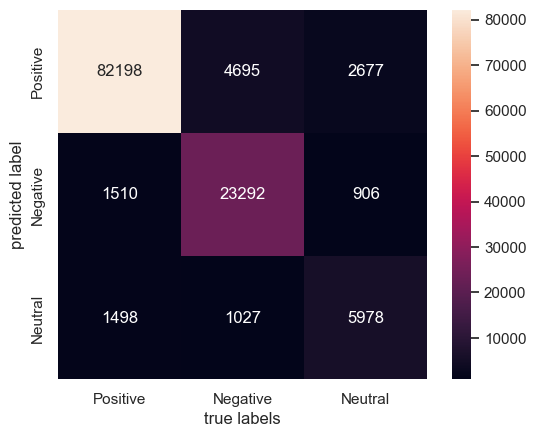

**************************************************
Test Score with tf-idf-vectorizer features 0.8516008111099441
Accuracy: 0.8516008111099441
Classification report :
              precision    recall  f1-score   support

    Negative       0.98      0.62      0.76     29014
     Neutral       1.00      0.23      0.38      9561
    Positive       0.83      1.00      0.90     85206

    accuracy                           0.85    123781
   macro avg       0.93      0.62      0.68    123781
weighted avg       0.88      0.85      0.83    123781



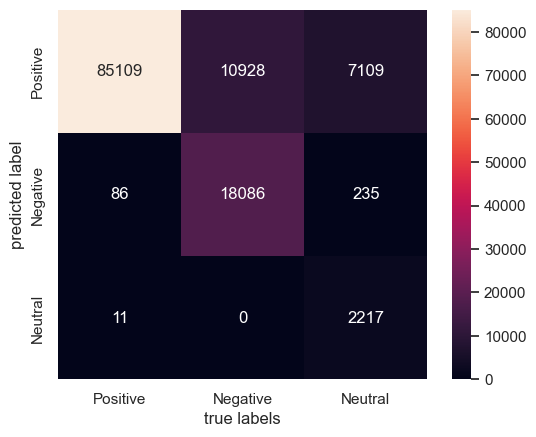

**************************************************
Test Score with bow features 0.9046380300692352
Accuracy: 0.9046380300692352
Classification report :
              precision    recall  f1-score   support

    Negative       0.93      0.78      0.85     29014
     Neutral       0.96      0.54      0.69      9561
    Positive       0.89      0.99      0.94     85206

    accuracy                           0.90    123781
   macro avg       0.93      0.77      0.83    123781
weighted avg       0.91      0.90      0.90    123781



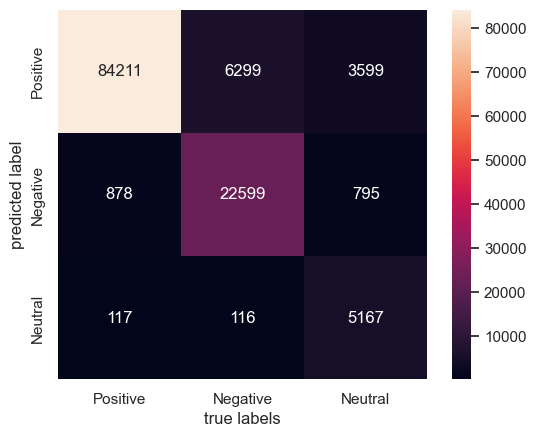

**************************************************


In [105]:
model = MultinomialNB()
model_tfidf = simple_logistic_classify(model, X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf-transformer')
model_tfidf = simple_logistic_classify(model, X_tfidf_tr, y_tr, X_tfidf_te, y_te, 'tf-idf-vectorizer')
model_bow = simple_logistic_classify(model, X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

### XGBoost


Test Score with bow features 0.7121609940136209
Accuracy: 0.7121609940136209
Classification report :
              precision    recall  f1-score   support

           0       0.87      0.11      0.19     29014
           1       0.93      0.01      0.02      9561
           2       0.71      1.00      0.83     85206

    accuracy                           0.71    123781
   macro avg       0.83      0.37      0.35    123781
weighted avg       0.76      0.71      0.62    123781



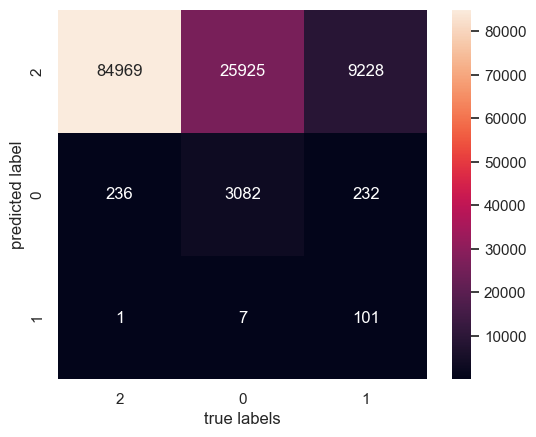

**************************************************
Test Score with tf-idf-transformer features 0.7121609940136209
Accuracy: 0.7121609940136209
Classification report :
              precision    recall  f1-score   support

           0       0.87      0.11      0.19     29014
           1       0.93      0.01      0.02      9561
           2       0.71      1.00      0.83     85206

    accuracy                           0.71    123781
   macro avg       0.83      0.37      0.35    123781
weighted avg       0.76      0.71      0.62    123781



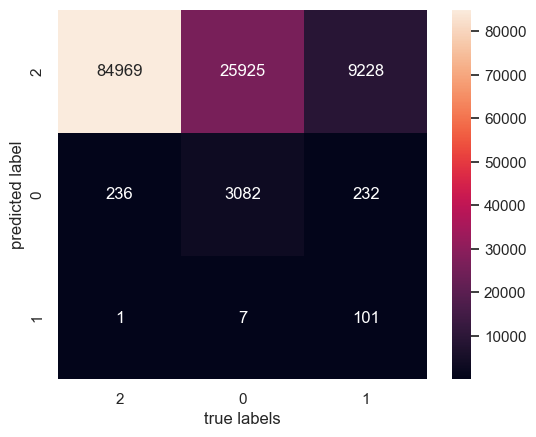

**************************************************
Test Score with tf-idf-vectorizer features 0.7132839450319516
Accuracy: 0.7132839450319516
Classification report :
              precision    recall  f1-score   support

           0       0.87      0.11      0.20     29014
           1       0.88      0.01      0.02      9561
           2       0.71      1.00      0.83     85206

    accuracy                           0.71    123781
   macro avg       0.82      0.37      0.35    123781
weighted avg       0.76      0.71      0.62    123781



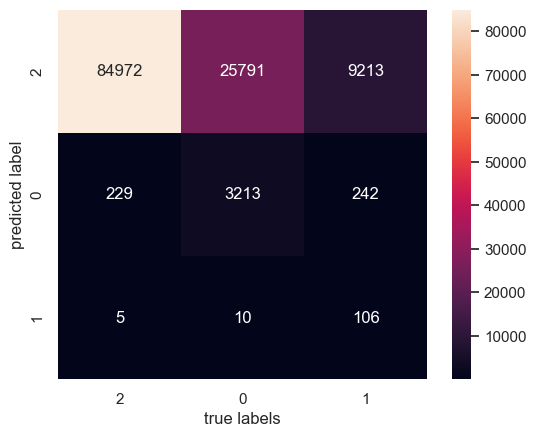

**************************************************


In [106]:

model = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

label_encoder = LabelEncoder()
y_tr_encoded = pd.Series(label_encoder.fit_transform(y_tr))
y_te_encoded = pd.Series(label_encoder.transform(y_te))

model_bow = simple_logistic_classify(model, X_tr_bow, y_tr_encoded, X_te_bow, y_te_encoded, 'bow')
model_tfidf = simple_logistic_classify(model, X_tr_tfidf, y_tr_encoded, X_te_tfidf, y_te_encoded, 'tf-idf-transformer')
model_tfidf = simple_logistic_classify(model, X_tfidf_tr, y_tr_encoded, X_tfidf_te, y_te_encoded, 'tf-idf-vectorizer')

### Support Vector Machine (SVM) !!

In [ ]:
# model = SVC(kernel='linear')
# model_tfidf = simple_logistic_classify(model, X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf-transformer')
# model_tfidf = simple_logistic_classify(model, X_tfidf_tr, y_tr, X_tfidf_te, y_te, 'tf-idf-vectorizer')
# model_bow = simple_logistic_classify(model, X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

##### For some reason, it was working infinitely without any result

### Random Forest

In [107]:
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model_tfidf = simple_logistic_classify(model, X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf-transformer')
# model_tfidf = simple_logistic_classify(model, X_tfidf_tr, y_tr, X_tfidf_te, y_te, 'tf-idf-vectorizer')
# model_bow = simple_logistic_classify(model, X_tr_bow, y_tr, X_te_bow, y_te, 'bow')

##### For some reason, it was working infinitely without any result

# Using BERT Models

## Finetuning

### Train test split

In [49]:
#training_data, test_data = train_test_split(reduced_filtered_dataset, train_size = 0.7, random_state=42)

# Split the data into training (80%) and temporary combined (20%)

from sklearn.preprocessing import LabelEncoder

reduced_filtered_dataset_encoded = reduced_filtered_dataset.copy()

label_encoder = LabelEncoder()
reduced_filtered_dataset_encoded['Label'] = label_encoder.fit_transform(reduced_filtered_dataset['Label'])

training_data, temp_data = train_test_split(reduced_filtered_dataset_encoded, test_size=0.2, random_state=42)

# Split the temporary combined data into validation (50%) and test (50%)
test_data, validation_data = train_test_split(temp_data, test_size=0.5, random_state=42)
training_data

,Reviews,Label,CleanReviews
969,Great thanks for all number-responsibility cam...,2,great thank number responsibility come good
240,Loving it,2,love
819,Works Good!,2,work good
692,"5.5"" Phone Unlocked Dual Sim Quad Core-JUNING...",2,phone unlock dual sim quad core juning android...
420,Got it so I could test an Android app. It work...,2,get could test android app work well issue sof...
...,...,...,...
1131,"Good quility mat,bad sound",0,good quility mat bad sound
1295,My PHONE HASN'T TURNT ON BEEN ON THE CHARGER F...,0,phone turnt charger longest
860,ok,2,ok
1460,"So far everything is pretty awesome, my plan d...",2,far everything pretty awesome plan work go way...


In [50]:
# Convert Pandas DataFrame to Hugging Face Dataset format
from datasets import Dataset, DatasetDict

dataset_dict = DatasetDict({
    
    "train": Dataset.from_dict({
        "text": training_data['CleanReviews'].tolist(),
        "label": training_data['Label'].tolist(),  # Include this line if you have labels
    }),
    "test": Dataset.from_dict({
        "text": test_data['CleanReviews'].tolist(),
        "label": test_data['Label'].tolist(),  # Include this line if you have labels
    }),
    "validation": Dataset.from_dict({
        "text": validation_data['CleanReviews'].tolist(),
        "label": validation_data['Label'].tolist(),  # Include this line if you have labels
    }),
    })

dataset_dict

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 1600
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 200
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 200
    })
})

In [51]:
from transformers import AutoModel
from transformers import AutoTokenizer
import torch

model_ckpt = 'distilbert-base-uncased'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True)

#for inspecting the vocabulary size
print('tokenizer vocab size: ',tokenizer.vocab_size) 

#Model maximum context size
print('Model max length: ',tokenizer.model_max_length)

# features name - An attribute to know about the fields that the model expects in its forward pass:
print('Features name: ',tokenizer.model_input_names)

#result = filtered_dataset['CleanReviews'].apply(lambda x: tokenizer(x, padding=True, truncation=True))

#print(tokenize(dataset_dict['train'][:2]))



tokenizer vocab size:  30522
Model max length:  512
Features name:  ['input_ids', 'attention_mask']


In [31]:
dataset_dict['train'][:2]

{'text': ['great thank number responsibility come good', 'love'],
 'label': ['Positive', 'Positive']}

In [44]:
dataset_dict['train'].features['label'].names

['negative', 'positive', 'no_impact', 'mixed']

In [52]:
BATCHED = True
ds_pretrained_features_encoded = dataset_dict.map(tokenize, batched=BATCHED, batch_size=None)

print('Feature Names of Dataset ', ds_pretrained_features_encoded['train'].column_names)

Map: 100%|██████████| 200/200 [00:00<00:00, 6611.61 examples/s]

Feature Names of Dataset  ['text', 'label', 'input_ids', 'attention_mask']


In [53]:
from transformers import AutoModel

model_ckpt = 'distilbert-base-uncased'

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = AutoModel.from_pretrained(model_ckpt).to(device)

def get_hidden_state(batch):
    inputs = {k:v.to(device) for k, v in batch.items()
                if k in tokenizer.model_input_names }
    
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
        
    return {'hidden_state': last_hidden_state[:, 0].cpu().numpy() }

ds_pretrained_features_encoded.set_format('torch', columns = ["input_ids", "attention_mask", "label"] )

pretrained_hidden_states = ds_pretrained_features_encoded.map(get_hidden_state, batched=BATCHED)

pretrained_hidden_states['train'].column_names

Map: 100%|██████████| 200/200 [00:38<00:00,  5.16 examples/s]


['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [54]:
import numpy as np

X_train = np.array(pretrained_hidden_states["train"]["hidden_state"])
X_valid = np.array(pretrained_hidden_states['validation']["hidden_state"])

y_train = np.array(pretrained_hidden_states["train"]["label"])
y_valid = np.array(pretrained_hidden_states["validation"]["label"])

print(f'Xtrain_shape : {X_train.shape}')
print(f'y_train_shape : {y_train.shape}')
print(f'X_valid_shape : {X_valid.shape}')

Xtrain_shape : (1600, 768)
y_train_shape : (1600,)
X_valid_shape : (200, 768)


In [55]:
# in this data hidden state 768 dimensions and featured scale [0,1] interval like MinMaxScale
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_train_scaled = MinMaxScaler().fit_transform(X_train)

# initialize and fit UMAP
mapper = UMAP(n_components = 2, metric="cosine").fit(X_train_scaled)

# Create a Dataframe of 2D embeddings

df_embedded_from_hidden = pd.DataFrame(mapper.embedding_,columns=["X","Y"])

df_embedded_from_hidden["label"] = y_train

display(df_embedded_from_hidden.head())

,X,Y,label
0,13.330940,2.173452,2
1,9.700865,4.643220,2
2,10.898648,2.146958,2
3,14.434649,11.447513,2
4,11.489271,11.508475,2


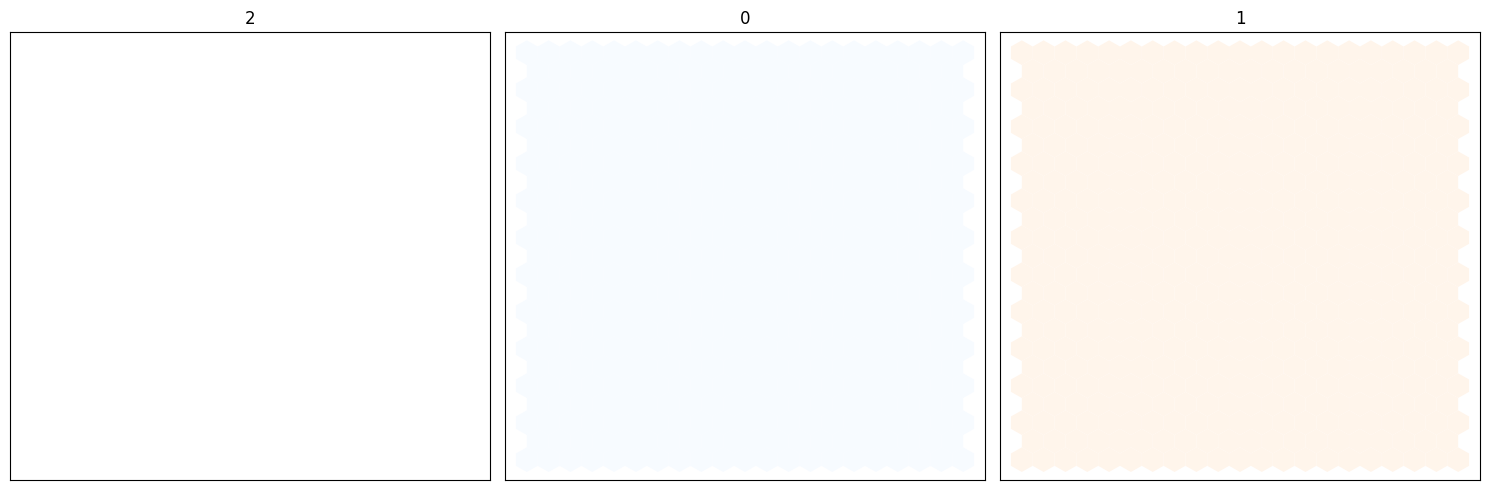

In [56]:
fig,axes = plt.subplots(1, 3, figsize=(15,5))

#1D axises
axes = axes.flatten()
''' extracting all 3 axes using flatten, so now it will be a list like below
[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:> <AxesSubplot:>]
'''

#Color used
cmaps = ['Greys', "Blues", "Oranges"]

#Labels name of ds_original_from_hf
#labels = dataset_dict["train"].features["label"].names
#labels = ds_original_from_hf['train'].features['label'].names

labels = df_embedded_from_hidden['label'].unique()

#separate
for i,(label, cmap) in enumerate(zip(labels, cmaps)):
    df_embedding_subplot = df_embedded_from_hidden.query(f"label == {i}")
    axes[i].hexbin(df_embedding_subplot["X"], df_embedding_subplot["Y"], cmap=cmap,
                  gridsize= 20, linewidths=(0,))
    axes[i].set_title(label, color='black')
    axes[i].set_xticks([]),axes[i].set_yticks([])
    
plt.tight_layout()
plt.show()

### Training model

In [38]:
ds_pretrained_features_encoded['train']

Dataset({
    features: ['text', 'label', 'input_ids', 'attention_mask'],
    num_rows: 1600
})

In [57]:
from transformers import AutoModelForSequenceClassification
from transformers import Trainer, TrainingArguments

num_labels = len(df_embedded_from_hidden['label'].unique())

model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels ).to(device) )

from sklearn.metrics import accuracy_score, f1_score

def compute_metric(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average = 'weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1}

batch_size = 12

logging_steps = len(ds_pretrained_features_encoded['train']) // batch_size

model_name = f"{model_ckpt}-finetune"

training_args = TrainingArguments(output_dir = model_name, 
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=False, 
                                  log_level="error"
                                  )


trainer = Trainer(model=model, args=training_args, compute_metrics=compute_metric,
                  train_dataset = ds_pretrained_features_encoded['train'],
                  eval_dataset = ds_pretrained_features_encoded["validation"],
                  tokenizer = tokenizer
                  )
trainer.train()


  0%|          | 0/268 [54:11<?, ?it/s]          

{'loss': 0.647, 'learning_rate': 1.0074626865671643e-05, 'epoch': 0.99}




















                                                 

  0%|          | 0/268 [54:57<?, ?it/s]        



{'eval_loss': 0.5872151851654053, 'eval_accuracy': 0.805, 'eval_f1': 0.7589976415094339, 'eval_runtime': 42.4598, 'eval_samples_per_second': 4.71, 'eval_steps_per_second': 0.4, 'epoch': 1.0}



  0%|          | 0/268 [1:19:31<?, ?it/s]        

{'loss': 0.4221, 'learning_rate': 1.4925373134328358e-07, 'epoch': 1.99}




















                                                 

  0%|          | 0/268 [1:20:28<?, ?it/s]      


100%|██████████| 268/268 [51:20<00:00, 11.49s/it]

{'eval_loss': 0.5143255591392517, 'eval_accuracy': 0.83, 'eval_f1': 0.7847606019151847, 'eval_runtime': 42.0956, 'eval_samples_per_second': 4.751, 'eval_steps_per_second': 0.404, 'epoch': 2.0}
{'train_runtime': 3080.039, 'train_samples_per_second': 1.039, 'train_steps_per_second': 0.087, 'train_loss': 0.5321362256558974, 'epoch': 2.0}


TrainOutput(global_step=268, training_loss=0.5321362256558974, metrics={'train_runtime': 3080.039, 'train_samples_per_second': 1.039, 'train_steps_per_second': 0.087, 'train_loss': 0.5321362256558974, 'epoch': 2.0})

#### PREDICT: Training with 1600 train values, 200 validation values and 200 test values took 51 minutes

In [58]:
preds_output = trainer.predict(ds_pretrained_features_encoded['validation'])
preds_output.metrics


100%|██████████| 17/17 [00:38<00:00,  2.26s/it]


{'test_loss': 0.5143255591392517,
 'test_accuracy': 0.83,
 'test_f1': 0.7847606019151847,
 'test_runtime': 40.8866,
 'test_samples_per_second': 4.892,
 'test_steps_per_second': 0.416}

In [65]:
preds_output = trainer.predict(ds_pretrained_features_encoded['train'])
preds_output.metrics

100%|██████████| 134/134 [10:06<00:00,  4.53s/it]


{'test_loss': 0.35328689217567444,
 'test_accuracy': 0.888125,
 'test_f1': 0.8594912744276857,
 'test_runtime': 611.2841,
 'test_samples_per_second': 2.617,
 'test_steps_per_second': 0.219}

In [67]:
preds_output = trainer.predict(ds_pretrained_features_encoded['test'])
preds_output.metrics

100%|██████████| 17/17 [01:15<00:00,  4.47s/it]


{'test_loss': 0.6306891441345215,
 'test_accuracy': 0.775,
 'test_f1': 0.7246357976183279,
 'test_runtime': 81.5311,
 'test_samples_per_second': 2.453,
 'test_steps_per_second': 0.209}

In [59]:
from torch.nn.functional import cross_entropy

def forward_pass_with_loss_and_label(batch):
    """
    This function performs a forward pass through the model, computes the loss and predicts labels.

    Args:
        batch (Dict[str, torch.Tensor]): Dictionary containing the model inputs and labels.

    Returns:
        Dict[str, Union[torch.Tensor, np.ndarray]]: Dictionary with the computed loss and predicted labels.
    """
    # Move the model inputs to the GPU (if available)
    # This is necessary because the model itself is likely on the GPU
    # Only model input names are included, other keys (e.g., 'labels') are ignored
    inputs = {k: v.to(device) for k, v in batch.items() 
              if k in tokenizer.model_input_names }

    # Ensures that gradients are not computed, saving memory
    with torch.no_grad():
        # Forward pass through the model
        output = model(**inputs)

        # Predict labels by selecting the argmax of the logits along the last dimension
        pred_label = torch.argmax(output.logits, axis=-1)

        # Compute the cross-entropy loss between the logits and true labels
        # reduction='none' ensures that we get a loss value for each sample, not the mean loss
        loss = cross_entropy(output.logits, batch['label'].to(device), reduction='none')

    # Returns the loss and predicted labels as numpy arrays
    # These are moved to the CPU first, because numpy cannot handle GPU tensors
    return {'loss': loss.cpu().numpy(), 
            'predicted_label': pred_label.cpu().numpy()}

#hide_output
# Convert our dataset back to PyTorch tensors
ds_pretrained_features_encoded.set_format("torch", 
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
ds_pretrained_features_encoded["validation"] = ds_pretrained_features_encoded["validation"].map(
    forward_pass_with_loss_and_label, batched=True, batch_size=16)

Map: 100%|██████████| 200/200 [00:41<00:00,  4.84 examples/s]


In [63]:
def label_int2str(row):
    return dataset_dict['train'].features['label'].int2str(row)

ds_pretrained_features_encoded.set_format("pandas")

cols = ['text', "label", "predicted_label", "loss"]

df_test = ds_pretrained_features_encoded["validation"][:][cols]

df_test["label"] = df_test["label"].apply(str)

df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(str))

df_test.sort_values('loss', ascending=False ).head(10)

,text,label,predicted_label,loss
87,preface would consider smartphone unite state ...,0,2,3.648942
155,compatible straight talk say unlock love size ...,1,2,3.510995
145,ok need better case,1,2,3.457055
123,decent phone money use flagships prepare embra...,1,2,3.391779
60,take phone mexico surf web make call voip regu...,2,0,3.181800
64,buy though customer please,1,2,3.044503
129,ad advertise unlock pay unlock phone number ap...,1,0,3.018331
105,alcatel idol compact decent phone good nice fo...,1,2,2.978694
62,know good phone months yet know good bad survise,0,2,2.933244
130,even though get phone weak batt order another ...,2,0,2.887352


In [64]:
df_test.sort_values('loss', ascending=True ).head(10)


,text,label,predicted_label,loss
152,good phone great price,2,2,0.036115
109,excellent fash,2,2,0.036864
188,excellent,2,2,0.037167
47,excellent,2,2,0.037167
52,excellent,2,2,0.037167
12,excellent,2,2,0.037167
102,great phone fast reliable happy phone,2,2,0.037185
20,excelente,2,2,0.037823
186,excelente,2,2,0.037823
76,excelente,2,2,0.037823


In [66]:
df_test.to_csv("predictions_using_pretrained_model.csv")

## Using PRETRAINED model

In [92]:
def calculateResults(dataset, dataset_labels):
    y_test = dataset['Label'].tolist()
    y_pred = dataset['label_predictions'].tolist()
    # dataset_labels = dataset['Label'].unique()

    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("Classification report :")
    print(classification_report(y_test, y_pred))

    mat = confusion_matrix(y_test, y_pred, labels=dataset_labels)
    sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=dataset_labels, yticklabels=dataset_labels)
    plt.xlabel("true labels")
    plt.ylabel("predicted label")
    plt.show()

### Evaluating using: bertweet-base-sentiment-analysis

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
C:\Users\FT\AppData\Local\Temp\ipykernel_3596\4201706679.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy_without_neutral['label_predictions'] = ["Positive" if result['label'] == "POS" else "Negative" for result in results ]


Accuracy: 1.0
Classification report :
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       609
    Positive       1.00      1.00      1.00      1241

    accuracy                           1.00      1850
   macro avg       1.00      1.00      1.00      1850
weighted avg       1.00      1.00      1.00      1850



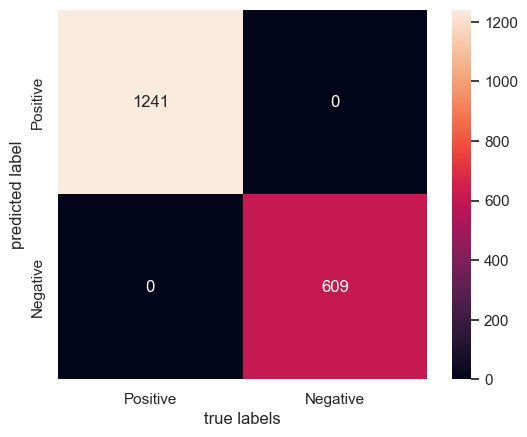

In [122]:
from transformers import pipeline
sentiment_pipeline = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

dataset_copy = reduced_filtered_dataset.copy()

dataset_copy_without_neutral = dataset_copy[dataset_copy['Label'] != 'Neutral']
data = dataset_copy_without_neutral['Label'].tolist()

results = sentiment_pipeline(data)
dataset_copy_without_neutral['label_predictions'] = ["Positive" if result['label'] == "POS" else "Negative" for result in results ]

calculateResults(dataset_copy_without_neutral,  dataset_copy_without_neutral['Label'].unique())

### Evaluating using: distilbert-base-uncased-finetuned-sst-2-english

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\FT\AppData\Local\Temp\ipykernel_3596\3931732631.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy_without_neutral['label_predictions'] = [result['label'].lower().capitalize() for result in results]


Accuracy: 1.0
Classification report :
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       609
    Positive       1.00      1.00      1.00      1241

    accuracy                           1.00      1850
   macro avg       1.00      1.00      1.00      1850
weighted avg       1.00      1.00      1.00      1850



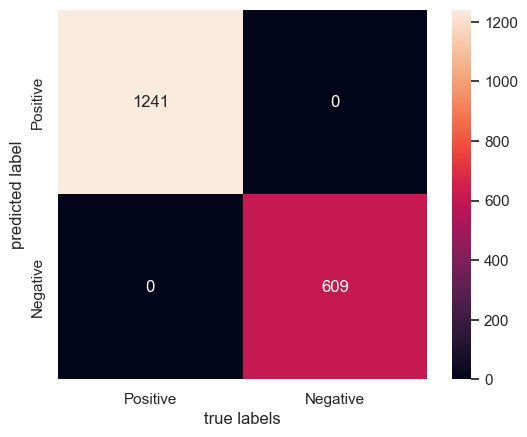

In [123]:
sentiment_pipeline = pipeline("sentiment-analysis")

dataset_copy = reduced_filtered_dataset.copy()

dataset_copy_without_neutral = dataset_copy[dataset_copy['Label'] != 'Neutral']
data = dataset_copy_without_neutral['Label'].tolist()

results = sentiment_pipeline(data)
dataset_copy_without_neutral['label_predictions'] = [result['label'].lower().capitalize() for result in results]

calculateResults(dataset_copy_without_neutral,  dataset_copy_without_neutral['Label'].unique())

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
C:\Users\FT\AppData\Local\Temp\ipykernel_3596\3993488494.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_copy_without_neutral['label_predictions'] = [result['label'].lower().capitalize() for result in results]


Accuracy: 0.7508108108108108
Classification report :
              precision    recall  f1-score   support

    Negative       0.58      0.85      0.69       609
    Positive       0.91      0.70      0.79      1241

    accuracy                           0.75      1850
   macro avg       0.74      0.78      0.74      1850
weighted avg       0.80      0.75      0.76      1850



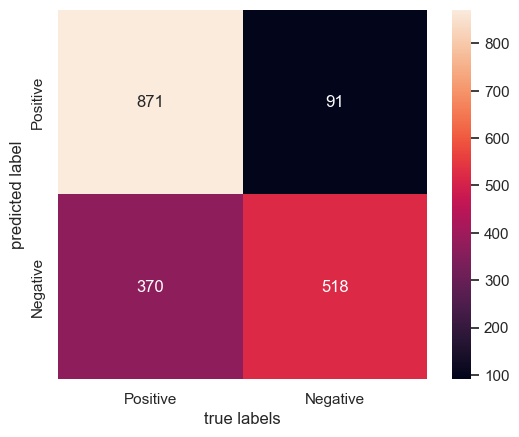

In [114]:
sentiment_pipeline = pipeline("sentiment-analysis")

dataset_copy = reduced_filtered_dataset.copy()

dataset_copy_without_neutral = dataset_copy[dataset_copy['Label'] != 'Neutral']
data = dataset_copy_without_neutral['CleanReviews'].tolist()

results = sentiment_pipeline(data)
dataset_copy_without_neutral['label_predictions'] = [result['label'].lower().capitalize() for result in results]

calculateResults(dataset_copy_without_neutral,  dataset_copy_without_neutral['Label'].unique())